In [1]:
import math
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_validate,GridSearchCV
import lightgbm as lgb
import seaborn as sns

In [107]:
# datat= pd.read_excel('air_quality_data.xlsx')
# datat

In [108]:
# import os
# import pandas as pd
# def get_season(month):
#     if month in [2, 3, 4]:
#         return 1
#     elif month in [5, 6, 7, 8]:
#         return 2
#     elif month in [9, 10, 11]:
#         return 3
#     elif month in [12, 1]:
#         return 4
# def calculate_wind_speed(U, V):
#     return np.sqrt(U**2 + V**2)   

# def calculate_wind_direction(U, V):
#     # 确保U和V没有缺失值
#     U = np.nan_to_num(U)
#     V = np.nan_to_num(V)
#     direction = np.arctan2(U, V) * (180 / np.pi)  # 转换为角度
#     direction = np.mod(direction + 360, 360)  # 确保风向在0到360度之间
#     return direction


# df_list = []

# for i in range(9, 24):
#     if i == 11:
#         continue
#     i_str = "{:02d}".format(i)
#     data = pd.read_csv(f'./wrfout/d04_mete_2024-05-{i_str}_00_00_00.txt', delimiter='\s+', header=None, engine='python',
#                    usecols=[0, 1, 2, 3, 5, 6, 7],
#                    names=['日期', '站点', 'U10', 'V10', '气温开尔文', 'YALIVAL', 'SHIDUVAL'])
    
#     if i == 10:
#         data = data[data['日期'].str.startswith(f'2024-05-{i_str}_') | data['日期'].str.startswith(f'2024-05-11_')]
#     else:
#         data = data[data['日期'].str.startswith(f'2024-05-{i_str}_')]
    
#     data['year'] = data['日期'].str[:4].astype(int)
#     data['month'] = data['日期'].str[5:7].astype(int)
#     data['day'] = data['日期'].str[8:10].astype(int)
#     data['hour'] = data['日期'].str[11:13].astype(int)
#     data['weather'] = data['month'].apply(get_season)
#     df_list.append(data)

# merged_data = pd.concat(df_list)

# columns_to_convert = ['U10', 'V10', '气温开尔文', 'YALIVAL', 'SHIDUVAL']

# for column in columns_to_convert:
#     merged_data[column] = pd.to_numeric(merged_data[column], errors='coerce')


# merged_data['FSVAL'] = calculate_wind_speed(merged_data['U10'], merged_data['V10'])
# merged_data['FXVAL'] = calculate_wind_direction(merged_data['U10'], merged_data['V10'])


# print(merged_data)

In [109]:
# merged_data.info()

In [110]:
# datat.interpolate(method='linear', limit_direction='both', inplace=True)

In [111]:
# datat['日期'] = pd.to_datetime(datat['日期'])
# datat['year'] = datat.日期.dt.year
# datat['month'] = datat.日期.dt.month
# datat['day'] = datat.日期.dt.day
# datat['hour'] = datat.日期.dt.hour
# datat['weekday'] = datat.日期.dt.weekday

# datat1 = datat[datat['站点']=='八大关街道']
# datat2 = datat[datat['站点']=='北宅街道']
# datat3 = datat[datat['站点']=='登州路街道']
# datat4 = datat[datat['站点']=='上马街道']
# datat5 = datat[datat['站点']=='兴城路街道']


# merged_data1 = merged_data[merged_data['站点']=='badaguan']
# merged_data2 = merged_data[merged_data['站点']=='beizhai']
# merged_data3 = merged_data[merged_data['站点']=='dengzhoulu']
# merged_data4 = merged_data[merged_data['站点']=='shangma']
# merged_data5 = merged_data[merged_data['站点']=='xingdenglu']


# datat1 =  pd.merge(datat1, merged_data1, on=['year', 'month', 'day', 'hour'], suffixes=('_datat', '_merged'))
# datat1 = datat1.drop(['日期_merged', '站点_merged', '城市'], axis=1)
# datat1 = datat1.rename(columns={'日期_datat': '日期', '站点_datat': '站点'})
# # datat1['O3_roll_mean_24'] = datat1['O3VAL'].rolling(window=24).mean()
# # datat1['O3_roll_max_24'] = datat1['O3VAL'].rolling(window=24).max()
# # datat1['O3_roll_min_24'] = datat1['O3VAL'].rolling(window=24).min()

# ###########################
# datat1['QIWENVAL'] = datat1['气温开尔文'] - 273.15

# print(datat1)

In [112]:
# def add_columns(df):
#     for i in range(1, 7*24+1):  # Loop through 1 to 24
#         new_col_name = f"O3VAL_{i}"  # New column name based on index
#         df[new_col_name] = df['O3VAL'].shift(i)

# # Call the function to add columns
# # add_columns(datat1)

# datat1.dropna(axis=0,
#           how='any',
#           subset=None,
#           inplace=True)

In [113]:
# datat1

In [2]:
xlsx_file = pd.ExcelFile('./2021-2022_O3&气象五参.xlsx')
sheet_names = xlsx_file.sheet_names
data = pd.DataFrame()



In [3]:
#得到2021和2022年的数据
for sheet in sheet_names[0:2]:
    df = xlsx_file.parse(sheet)
    data = pd.concat([data,df])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105120 entries, 0 to 52559
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   C0007_PNAME     105120 non-null  object        
 1   C1705_DATETIME  105120 non-null  datetime64[ns]
 2   O3VAL           105061 non-null  float64       
 3   QIWENVAL        105077 non-null  float64       
 4   FSVAL           105077 non-null  float64       
 5   FXVAL           105077 non-null  float64       
 6   SHIDUVAL        105077 non-null  float64       
 7   YALIVAL         105077 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 7.2+ MB


In [5]:
data

,C0007_PNAME,C1705_DATETIME,O3VAL,QIWENVAL,FSVAL,FXVAL,SHIDUVAL,YALIVAL
0,八大关街道,2021-01-01 00:00:00,6.938,-4.038,1.380,134.779,50.243,1029.000
1,八大关街道,2021-01-01 01:00:00,13.344,-3.888,1.255,190.495,49.828,1029.000
2,八大关街道,2021-01-01 02:00:00,11.474,-4.248,1.068,180.058,51.991,1029.000
3,八大关街道,2021-01-01 03:00:00,8.646,-4.650,0.981,216.684,54.268,1028.567
4,八大关街道,2021-01-01 04:00:00,13.963,-4.773,1.014,214.455,52.177,1027.792
...,...,...,...,...,...,...,...,...
52555,珠海街道,2022-12-31 19:00:00,37.291,4.690,0.595,96.414,65.384,1026.644
52556,珠海街道,2022-12-31 20:00:00,18.326,4.228,0.772,51.686,66.851,1027.210
52557,珠海街道,2022-12-31 21:00:00,5.964,3.627,0.967,60.121,67.638,1027.572
52558,珠海街道,2022-12-31 22:00:00,2.345,2.626,0.927,94.954,71.013,1027.736


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105120 entries, 0 to 52559
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   C0007_PNAME     105120 non-null  object        
 1   C1705_DATETIME  105120 non-null  datetime64[ns]
 2   O3VAL           105061 non-null  float64       
 3   QIWENVAL        105077 non-null  float64       
 4   FSVAL           105077 non-null  float64       
 5   FXVAL           105077 non-null  float64       
 6   SHIDUVAL        105077 non-null  float64       
 7   YALIVAL         105077 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 7.2+ MB


In [4]:
data['C1705_DATETIME'] = pd.to_datetime(data['C1705_DATETIME'])
data['year'] = data.C1705_DATETIME.dt.year
data['month'] = data.C1705_DATETIME.dt.month
data['day'] = data.C1705_DATETIME.dt.day
data['hour'] = data.C1705_DATETIME.dt.hour
data['weekday'] = data.C1705_DATETIME.dt.weekday

data1 = data[data['C0007_PNAME']=='八大关街道']
data2 = data[data['C0007_PNAME']=='北宅街道']
data3 = data[data['C0007_PNAME']=='登州路街道']
data4 = data[data['C0007_PNAME']=='上马街道']
data5 = data[data['C0007_PNAME']=='兴城路街道']



data1['O3VAL'].interpolate(method='linear', limit_direction='both', inplace=True)
data1['O3VAL'].fillna(method='ffill', inplace=True)
data1['O3VAL'].fillna(method='bfill', inplace=True)




C:\Users\lenovo\AppData\Local\Temp\ipykernel_30460\1337936461.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['O3VAL'].interpolate(method='linear', limit_direction='both', inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_30460\1337936461.py:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1['O3VAL'].fillna(method='ffill', inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_30460\1337936461.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['O3VAL'].fillna(method='ffill', inplace=True)
C:\Use

In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17520 entries, 0 to 30479
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   C0007_PNAME     17520 non-null  object        
 1   C1705_DATETIME  17520 non-null  datetime64[ns]
 2   O3VAL           17520 non-null  float64       
 3   QIWENVAL        17520 non-null  float64       
 4   FSVAL           17520 non-null  float64       
 5   FXVAL           17520 non-null  float64       
 6   SHIDUVAL        17520 non-null  float64       
 7   YALIVAL         17520 non-null  float64       
 8   year            17520 non-null  int32         
 9   month           17520 non-null  int32         
 10  day             17520 non-null  int32         
 11  hour            17520 non-null  int32         
 12  weekday         17520 non-null  int32         
dtypes: datetime64[ns](1), float64(6), int32(5), object(1)
memory usage: 1.5+ MB


In [8]:
data1

,C0007_PNAME,C1705_DATETIME,O3VAL,QIWENVAL,FSVAL,FXVAL,SHIDUVAL,YALIVAL,year,month,day,hour,weekday
0,八大关街道,2021-01-01 00:00:00,6.938,-4.038,1.380,134.779,50.243,1029.000,2021,1,1,0,4
1,八大关街道,2021-01-01 01:00:00,13.344,-3.888,1.255,190.495,49.828,1029.000,2021,1,1,1,4
2,八大关街道,2021-01-01 02:00:00,11.474,-4.248,1.068,180.058,51.991,1029.000,2021,1,1,2,4
3,八大关街道,2021-01-01 03:00:00,8.646,-4.650,0.981,216.684,54.268,1028.567,2021,1,1,3,4
4,八大关街道,2021-01-01 04:00:00,13.963,-4.773,1.014,214.455,52.177,1027.792,2021,1,1,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30475,八大关街道,2022-12-31 19:00:00,12.933,2.795,0.476,139.816,79.887,1029.542,2022,12,31,19,5
30476,八大关街道,2022-12-31 20:00:00,30.211,3.083,0.859,179.852,77.844,1030.000,2022,12,31,20,5
30477,八大关街道,2022-12-31 21:00:00,23.378,3.059,0.559,81.128,75.709,1030.775,2022,12,31,21,5
30478,八大关街道,2022-12-31 22:00:00,7.542,2.428,0.972,81.307,77.054,1031.000,2022,12,31,22,5


In [5]:
# date	O3VAL	QIWENVAL	FSVAL	FXVAL	SHIDUVAL	YALIVAL
import pandas as pd
# 使用切片和字符串拼接将列名从 'O3VAL_1' 到 'O3VAL_72' 构建出来
o3_columns = ['O3VAL_' + str(i) for i in range(1,28*24+1)]

# 选择需要的列并打印结果
X = data1[['C1705_DATETIME'] + ['O3VAL']]

test_start_index = len(X) - 7 * 24

train_data = X.iloc[:test_start_index]
test_data = X.iloc[test_start_index:]

test_data


,C1705_DATETIME,O3VAL
30312,2022-12-25 00:00:00,37.858
30313,2022-12-25 01:00:00,40.974
30314,2022-12-25 02:00:00,28.525
30315,2022-12-25 03:00:00,29.655
30316,2022-12-25 04:00:00,27.859
...,...,...
30475,2022-12-31 19:00:00,12.933
30476,2022-12-31 20:00:00,30.211
30477,2022-12-31 21:00:00,23.378
30478,2022-12-31 22:00:00,7.542


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings("ignore")

# 复制数据
datacopy = train_data
datacopy.rename(columns={'C1705_DATETIME': 'time_data'}, inplace=True)
datacopy = datacopy.set_index('time_data')
datacopy

,O3VAL
time_data,
2021-01-01 00:00:00,6.938
2021-01-01 01:00:00,13.344
2021-01-01 02:00:00,11.474
2021-01-01 03:00:00,8.646
2021-01-01 04:00:00,13.963
...,...
2022-12-24 19:00:00,53.636
2022-12-24 20:00:00,51.864
2022-12-24 21:00:00,49.754


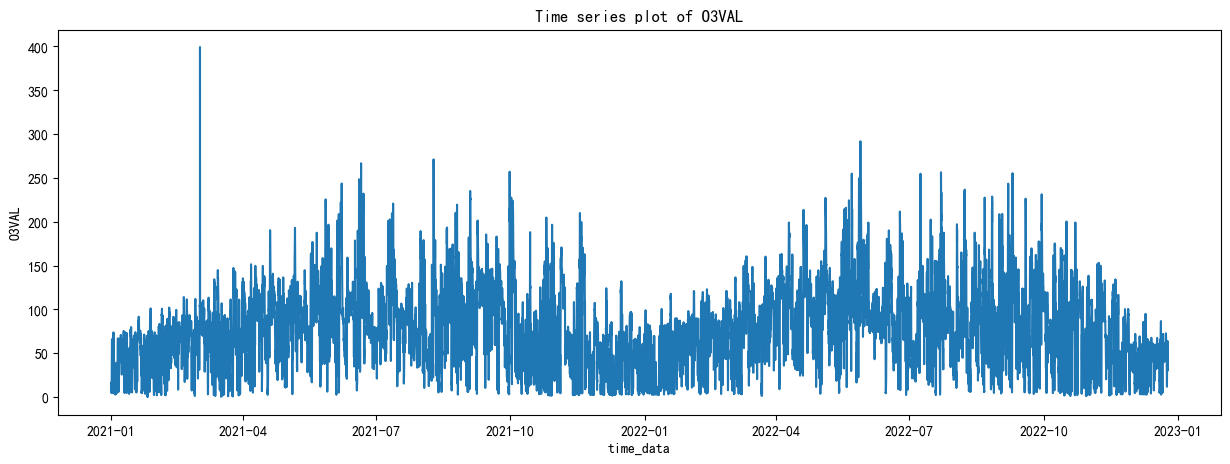

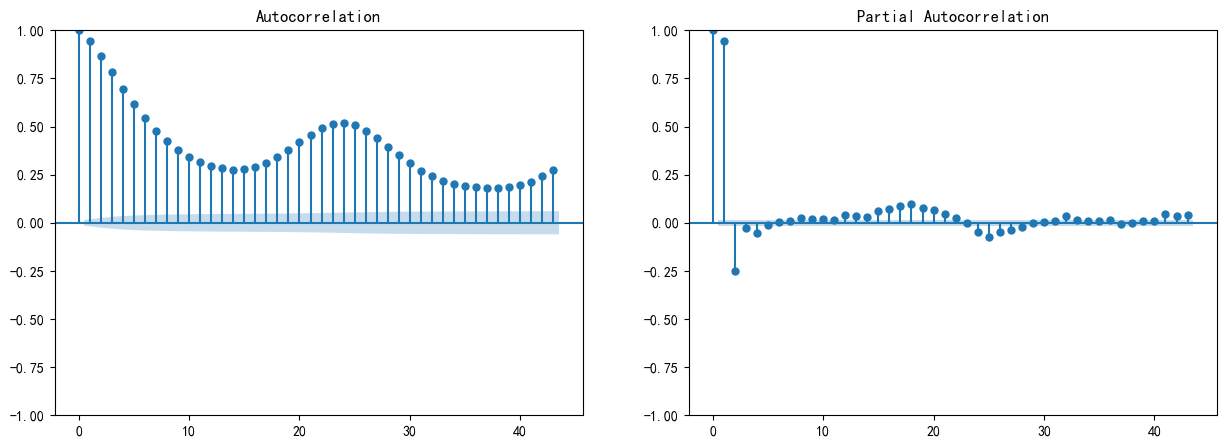

In [7]:
plt.figure(figsize=(15, 5))
sns.lineplot(x=datacopy.index, y='O3VAL', data=datacopy)
plt.title('Time series plot of O3VAL')
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plot_acf(datacopy, ax=ax[0])
plot_pacf(datacopy, ax=ax[1])
plt.show()

In [15]:
def test_stationarity(timeseries):
    dftest = adfuller(timeseries)
    print('ADF Statistic: %f' % dftest[0])
    print('p-value: %f' % dftest[1])

test_stationarity(datacopy['O3VAL'])

ADF Statistic: -9.591038
p-value: 0.000000


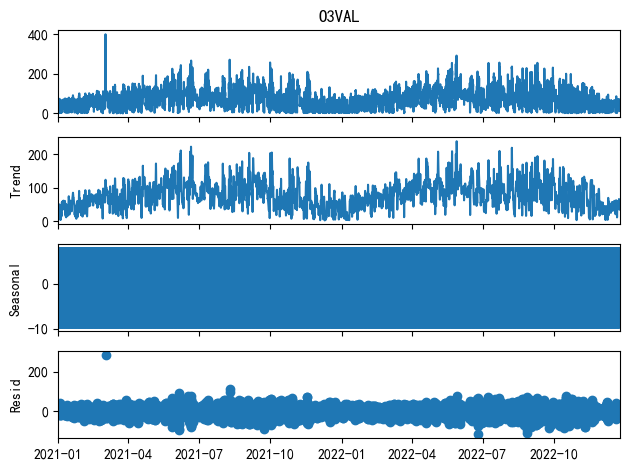

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(datacopy['O3VAL'], model='additive', period=12)
decomposition.plot()
plt.show()

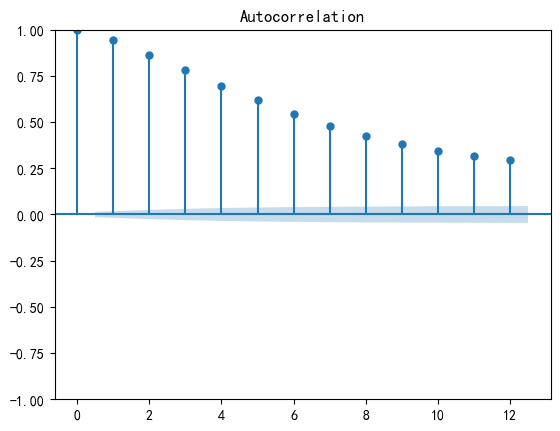

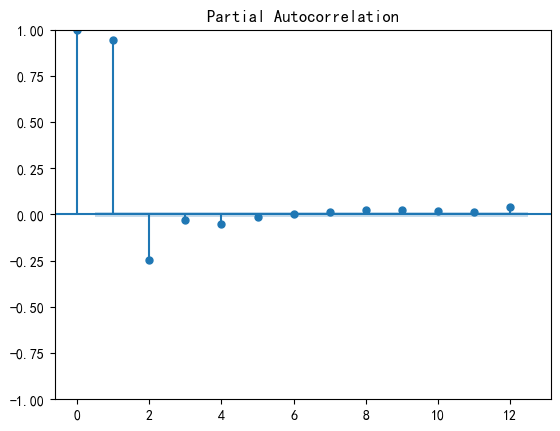

In [17]:
plot_acf(datacopy['O3VAL'], lags=12)
plot_pacf(datacopy['O3VAL'], lags=12)
plt.show()

In [52]:

# 定义一个函数来计算AIC和BIC
def evaluate_arima_model(series, arima_order):
    try:
        model = sm.tsa.ARIMA(series, order=arima_order)
        results = model.fit()
        return results.aic, results.bic
    except:
        return np.nan, np.nan

# 定义一个函数来遍历所有可能的参数组合
def evaluate_models(series, p_values, d_values, q_values):
    best_aic = float("inf")
    best_bic = float("inf")
    best_order_aic = None
    best_order_bic = None
    
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                aic, bic = evaluate_arima_model(series, order)
                if aic < best_aic:
                    best_aic = aic
                    best_order_aic = order
                if bic < best_bic:
                    best_bic = bic
                    best_order_bic = order
    print(f'Best ARIMA{best_order_aic} AIC={best_aic:.2f}')
    print(f'Best ARIMA{best_order_bic} BIC={best_bic:.2f}')

# 设置参数范围
p_values = range(0, 5)
d_values = range(0, 2)
q_values = range(0, 5)

# 执行网格搜索
evaluate_models(datacopy, p_values, d_values, q_values)

d:\miniconda3\envs\DLpytorch\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
d:\miniconda3\envs\DLpytorch\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
d:\miniconda3\envs\DLpytorch\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
d:\miniconda3\envs\DLpytorch\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
d:\miniconda3\envs\DLpytorch\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H w

Best ARIMA(4, 0, 4) AIC=141026.27
Best ARIMA(4, 0, 4) BIC=141103.88


In [18]:
# 选择合适的参数 p, d, q, P, D, Q, s
# 你可以根据实际情况调整这些参数
p = 1
d = 1
q = 1
P = 1
D = 1
Q = 1
s = 12

model = SARIMAX(datacopy['O3VAL'], order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit(disp=-1)
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              O3VAL   No. Observations:                17352
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -70794.937
Date:                            Tue, 06 Aug 2024   AIC                         141599.875
Time:                                    17:36:43   BIC                         141638.679
Sample:                                01-01-2021   HQIC                        141612.659
                                     - 12-24-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0452      0.030     -1.498      0.134      -0.104       0.014
ma.L1          0.2180      0.030   

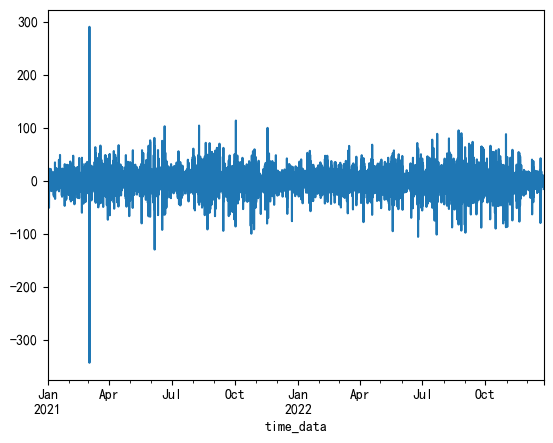

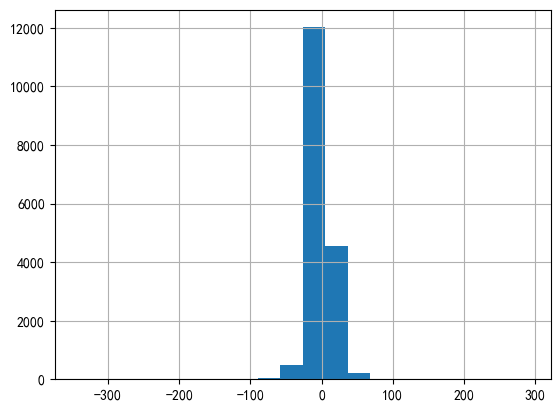

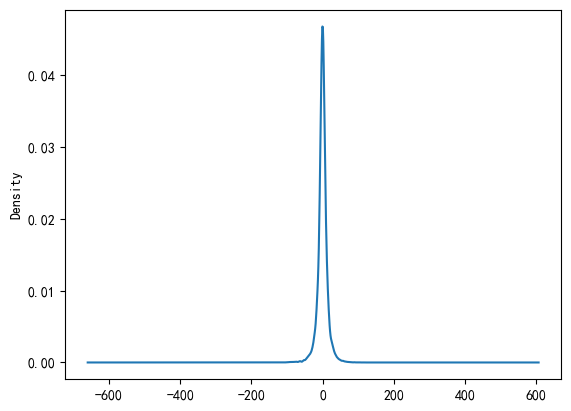

count    17352.000000
mean        -0.012020
std         14.341033
min       -343.350476
25%         -5.765801
50%          0.081668
75%          6.003772
max        290.344822
dtype: float64
ShapiroResult(statistic=0.8702186942100525, pvalue=0.0)


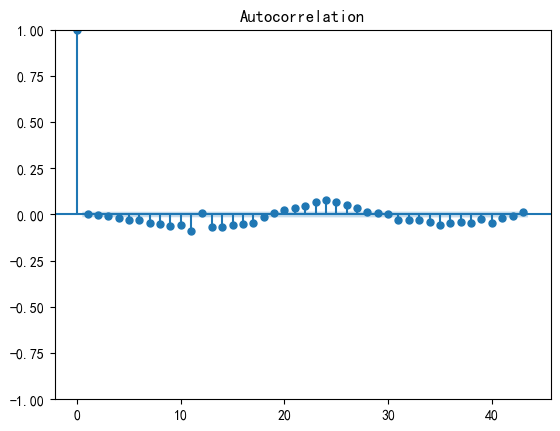

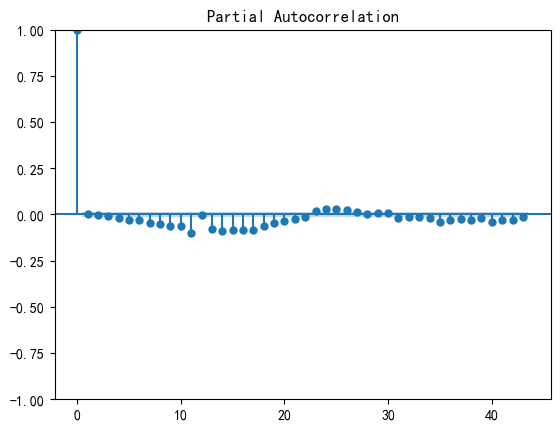

In [21]:
residuals = results.resid
residuals.plot()
plt.show()

residuals.hist(bins=20)
plt.show()

residuals.plot(kind='kde')
plt.show()

print(residuals.describe())
from scipy.stats import shapiro

# 检查残差是否满足正态分布
shapiro_test = shapiro(residuals)
print(shapiro_test)

plot_acf(residuals)
plt.show()

plot_pacf(residuals)
plt.show()

In [26]:
start_date = pd.Timestamp("2022-12-25 00:00:00")
end_date = pd.Timestamp("2022-12-31 23:00:00")
forecast = results.predict(start=start_date, end=end_date)

print(forecast)

2022-12-25 00:00:00    32.294250
2022-12-25 01:00:00    34.934076
2022-12-25 02:00:00    37.091532
2022-12-25 03:00:00    35.535325
2022-12-25 04:00:00    32.228107
                         ...    
2022-12-31 19:00:00    16.177655
2022-12-31 20:00:00    14.935971
2022-12-31 21:00:00    19.424034
2022-12-31 22:00:00    22.143998
2022-12-31 23:00:00    26.619178
Freq: H, Name: predicted_mean, Length: 168, dtype: float64


In [16]:
# 按x坐标即index求平均
def average_values(data, interval):
    averaged_data = []
    for i in range(0, len(data), interval):
        avg = np.mean(data[i:i+interval])
        averaged_data.append(avg)
    return averaged_data

In [27]:
y = test_data['O3VAL']
y_pred = forecast.values

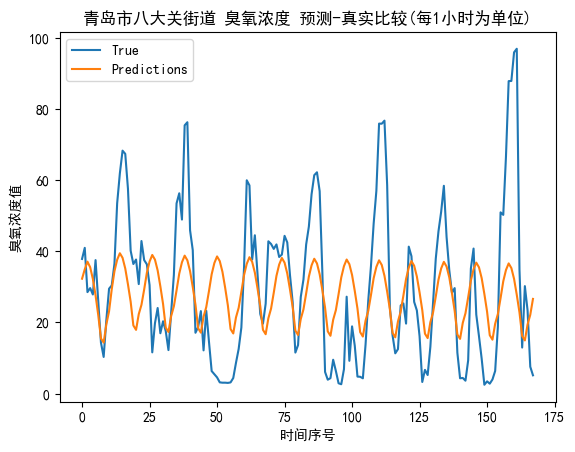

mean_absolute_error: 14.401304893870579
mean_squared_error: 351.2186500672271
rmse: 18.740828425318533
r2 score: 0.24314159059847384
corrcoef score: 0.5384981275368854


In [28]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# 绘制真实值和预测值的曲线
plt.title("青岛市八大关街道 臭氧浓度 预测-真实比较(每1小时为单位)")
plt.plot(y.values, label='True')
plt.plot(y_pred, label='Predictions')
plt.xlabel('时间序号')
plt.ylabel('臭氧浓度值')
plt.legend()
plt.show()

print("mean_absolute_error:", mean_absolute_error(y.values, y_pred))
print("mean_squared_error:", mean_squared_error(y.values, y_pred))
print("rmse:", math.sqrt(mean_squared_error(y.values, y_pred)))
print("r2 score:", r2_score(y.values, y_pred))
print("corrcoef score:", np.corrcoef(y.values, y_pred)[0,1])